In [1215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1216]:
#nltk library

In [1569]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords


In [ ]:
# sklearn library

In [1581]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [1562]:
import string

In [1218]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier


In [1219]:

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='pearl')

In [1220]:
from chart_studio.plotly import iplot
import cufflinks

from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


# ADDING SP500 DATA WITH EXTRA COLUMN

In [1310]:
import yfinance as yf
SP500 = yf.download("^GSPC", start="2010-01-06", end="2020-01-06",
                   group_by="ticker")

[*********************100%***********************]  1 of 1 completed


In [1315]:
sp500 = SP500.reset_index()

In [1317]:
sp500['year-month'] = [
    pd.datetime(year, month, 1) for year, month in zip(
        sp500['Date'].dt.year, sp500['Date'].dt.month)]

In [1319]:
sp500['year'] = sp500['Date'].dt.year

In [1320]:
sp500['month'] = sp500['Date'].dt.month

In [1321]:
sp500

,Date,Open,High,Low,Close,Adj Close,Volume,year-month,year,month
0,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,2010-01-01,2010,1
1,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,2010-01-01,2010,1
2,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,2010-01-01,2010,1
3,2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,2010-01-01,2010,1
4,2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,2010-01-01,2010,1
...,...,...,...,...,...,...,...,...,...,...
2512,2019-12-30,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3013290000,2019-12-01,2019,12
2513,2019-12-31,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2893810000,2019-12-01,2019,12
2514,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000,2020-01-01,2020,1
2515,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000,2020-01-01,2020,1


In [1359]:
import plotly.graph_objects as go


In [859]:
sp500['change'] = (sp500['Close'] - sp500['Open'])/sp500['Open']

In [860]:
sp500

,Date,Open,High,Low,Close,Adj Close,Volume,change
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0.014715
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003408
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.001259
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004770
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.003910
...,...,...,...,...,...,...,...,...
2516,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000,0.004062
2517,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000,0.002631
2518,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000,0.008929
2519,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000,-0.001444


In [861]:
def grouping(series):
    if series < 0:
        return "decrease"
    if series > 0:
        return "increase"

In [862]:
sp500['label'] = sp500['change'].apply(grouping)

In [863]:
sp500['label'].value_counts()

increase    1369
decrease    1150
Name: label, dtype: int64

In [864]:
sp500

,Date,Open,High,Low,Close,Adj Close,Volume,change,label
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,0.014715,increase
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003408,increase
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.001259,increase
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004770,increase
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.003910,increase
...,...,...,...,...,...,...,...,...,...
2516,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000,0.004062,increase
2517,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000,0.002631,increase
2518,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000,0.008929,increase
2519,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000,-0.001444,decrease


## Reading articles data

In [875]:
df_stocks = pd.read_csv("df - df.csv")

In [ ]:
#combine 2020 dataset

In [877]:
df_stocks = df_stocks.loc[0:2513,]

In [904]:
df_stocks = df_stocks.rename(columns = {'Articles_x':'Articles'})

In [869]:
df20 = pd.read_csv("df20.csv")

In [870]:
df2020 = df20[['Date','Close','articles']]

In [871]:
df2020

,Date,Close,articles
0,2020-01-02,3257.850098,". N.B.A. Superstars, Growth and Lockouts: The ..."
1,2020-01-03,3234.850098,. ‘The New Pope’ Looks a Lot Like John Malkovi...
2,2020-01-06,3246.280029,". No Corrections: Jan. 6, 2020. A Typical Trum..."


In [872]:
df2020 = df2020.rename(columns = {'articles':'Articles'})

In [879]:
df_stocks = pd.concat([df_stocks, df2020],axis = 0, ignore_index=True)

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [850]:
df_stocks = df_stocks[['Date','Close','Articles']]

In [851]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 3 columns):
Date        2517 non-null object
Close       2517 non-null float64
Articles    3 non-null object
dtypes: float64(1), object(2)
memory usage: 59.1+ KB


In [882]:
df_Stocks = df_stocks[['Date','Close','Articles']]

In [883]:
df_stocks.to_csv('dateandarticles.csv')

In [900]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 3 columns):
Date        2517 non-null object
Close       2517 non-null float64
Articles    2515 non-null object
dtypes: float64(1), object(2)
memory usage: 59.1+ KB


In [917]:
df_stocks['Articles'] = df_stocks['Articles'].map(lambda x: x.strip('.-'))

In [919]:
df_stocks = df_stocks[['Date','Close','Articles']]

## SENTIMENT ANALYSIS

In [952]:
df1 = df_stocks[['Date']]

In [953]:
df1["compound"] = ''
df1["neg"] = ''
df1["neu"] = ''
df1["pos"] = ''

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [889]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 4 columns):
Articles      2515 non-null object
Close         2517 non-null float64
Date          2517 non-null object
Unnamed: 0    2514 non-null float64
dtypes: float64(2), object(2)
memory usage: 78.8+ KB


In [915]:
df_stocks.dropna(inplace = True)

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1074]:
#df_stocks.to_csv('articles.csv')

In [1585]:
df_stocks = pd.read_csv('articles.csv')

In [1588]:
df_stocks.drop('Unnamed: 0', axis =1)

,Date,Close,Articles,corp,sent
0,2010-01-06,1137.140015,Taiwan Bans Some U.S. Beef Imports. Not Guilt...,['taiwan ban u beef import guilti plea philipp...,Negative
1,2010-01-07,1141.689941,"North Korea Started Uranium Program in 1990s,...",['north korea start uranium program south say ...,Negative
2,2010-01-08,1144.979980,Brown Survives Attempt to Unseat Him. 4 Dead ...,['brown surviv attempt unseat dead hour gun ba...,Negative
3,2010-01-11,1146.979980,Philippines Gun Ban Starts Ahead of Vote. Bri...,['philippin gun ban start ahead vote british j...,Negative
4,2010-01-12,1136.219971,Neanderthal Decorative Shells Found in Southe...,['neanderth decor shell found southeastern spa...,Negative
...,...,...,...,...,...
2510,2019-12-30,3221.290039,Lisa Murkowski: A ‘Lone Voice of Independence...,['lisa murkowski lone voic independ need walt ...,Negative
2511,2019-12-31,3230.780029,"New Jersey Collectors Who are Crafty, in More...",['new jersey collector crafti way one baugh br...,Negative
2512,2020-01-02,3257.850098,"N.B.A. Superstars, Growth and Lockouts: The D...",['n b superstar growth lockout david stern yea...,Negative
2513,2020-01-03,3234.850098,‘The New Pope’ Looks a Lot Like John Malkovic...,['new pope look lot like john malkovich appala...,Negative


In [945]:
df_stocks.sent.value_counts()

Negative    2444
Positive      71
Name: sent, dtype: int64

## Vader sentiment function 

In [955]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'Articles']) # NORMALIZED FORM COMPATIABILITY DECOMPOSITION
        ss = sid.polarity_scores(sentence)
        df1.at[date, 'compound'] = ss['compound']
        df1.at[date, 'neg'] = ss['neg']
        df1.at[date, 'neu'] = ss['neu']
        df1.at[date, 'pos'] = ss['pos']
    except TypeError:
        print(df_stocks.loc[date, 'Articles'])
        print(date)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zoe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [1534]:
## TEXTBLOB

In [1574]:
df_stocks.Articles[2514]

' No Corrections: Jan. 6, 2020. A Typical Trump Vacation, With a Momentous Result. How the Lady Became Less Gray. Michelle Williams Tells Women to Vote for Their Rights at Golden Globes. Before and After the Golden Globes, From Red Carpet to the After-Parties. Hollywood Sheds Its Cares at the Golden Globes, but Not All of Them. The Insanity of Trump’s Wine Tariffs. A Democrat Who Can Beat Trump. A Democrat Who Can Beat Trump. Earthquake Strikes Puerto Rico, Toppling a Well-Known Natural Wonder. Awash in Disinformation Before Vote, Taiwan Points Finger at China. The Role of a Career in ‘Fiddler,’ and He Might Even Keep the Beard. Harvey Weinstein Charged With Rape in Los Angeles as N.Y. Trial Starts. The U.S. Seemed to Be Leaving Iraq. But It Was All an ‘Honest Mistake.’. Iran, Australia Fires, Taiwan election: Your Tuesday Briefing. Dallas Cowboys, After a Long Divorce, Commit to Mike McCarthy as Coach. Tua Tagovailoa, Alabama’s Star Quarterback, Will Enter the N.F.L. Draft. Awash in D

# TEXTBLOB Sentiment analysis

In [1552]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df_stocks['Articles']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df = pd.DataFrame([list(df_stocks['Articles']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['text', 'sentiment_score', 'sentiment_category']
#df['sentiment_score'] = df.sentiment_score.astype('float')
#df.groupby(by=['news_category']).describe()

In [1554]:
df.sentiment_category.value_counts()

positive    2305
negative     201
neutral        9
Name: sentiment_category, dtype: int64

In [1553]:
df

,text,sentiment_score,sentiment_category
0,Taiwan Bans Some U.S. Beef Imports. Not Guilt...,0.002,positive
1,"North Korea Started Uranium Program in 1990s,...",0.02,positive
2,Brown Survives Attempt to Unseat Him. 4 Dead ...,0.019,positive
3,Philippines Gun Ban Starts Ahead of Vote. Bri...,0.004,positive
4,Neanderthal Decorative Shells Found in Southe...,0.071,positive
...,...,...,...
2510,Lisa Murkowski: A ‘Lone Voice of Independence...,0.059,positive
2511,"New Jersey Collectors Who are Crafty, in More...",0.112,positive
2512,"N.B.A. Superstars, Growth and Lockouts: The D...",0.096,positive
2513,‘The New Pope’ Looks a Lot Like John Malkovic...,0.044,positive


##  clean text remove stopwords using SPACY

In [1575]:
import spacy
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)


In [1582]:
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]

class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text


def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPWORDS]
    tokens = [tok for tok in tokens if tok not in STOPWORDS]
    return tokens

In [1584]:
cleantext = cleanup_text(df.text)
cleantext = ' '.join(cleantext).split()

Text(0.5, 1.0, 'Most Common Words used in the research papers for conference INFOCOM')

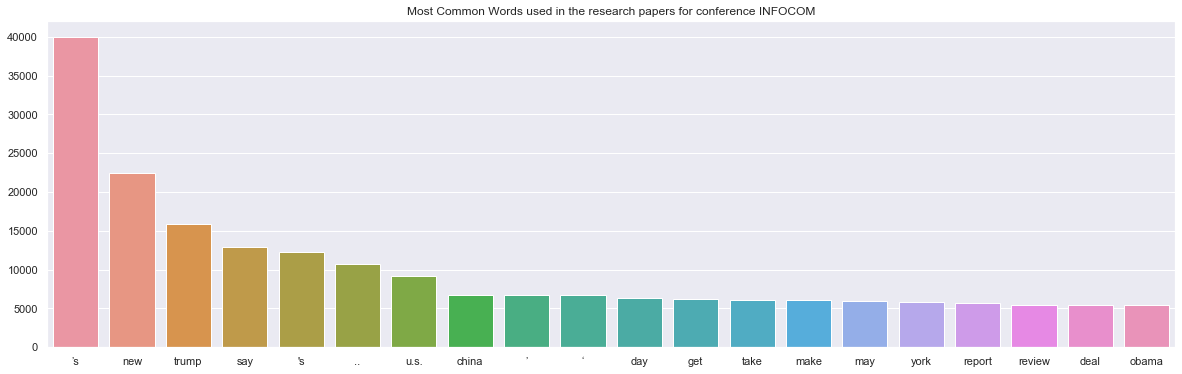

In [1592]:
counts = Counter(cleantext)
textcounts = Counter(counts)
common_words = [word[0] for word in counts.most_common(20)]
common_counts = [word[1] for word in counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=common_words, y=common_counts)
plt.show()

In [1593]:
common_words

['’s',
 'new',
 'trump',
 'say',
 "'s",
 '..',
 'u.s.',
 'china',
 '’',
 '‘',
 'day',
 'get',
 'take',
 'make',
 'may',
 'york',
 'report',
 'review',
 'deal',
 'obama']

# COMBINE TWO DATASETS

In [1056]:
totaldf = pd.merge(df1,sp500,on = 'Date')

In [1060]:
totaldf.to_csv('totaldf.csv')

In [1058]:
totaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2514
Data columns (total 13 columns):
Date         2515 non-null object
compound     2515 non-null object
neg          2515 non-null object
neu          2515 non-null object
pos          2515 non-null object
Open         2515 non-null float64
High         2515 non-null float64
Low          2515 non-null float64
Close        2515 non-null float64
Adj Close    2515 non-null float64
Volume       2515 non-null int64
change       2515 non-null float64
label        2513 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 275.1+ KB


In [1061]:
totaldf['Volume'] = totaldf['Volume'].astype(float)

In [1062]:
totaldf['compound'] = totaldf['compound'].astype(float)
totaldf['neg'] = totaldf['neg'].astype(float)
totaldf['neu'] = totaldf['neu'].astype(float)
totaldf['pos'] = totaldf['pos'].astype(float)

In [1063]:
totaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2514
Data columns (total 13 columns):
Date         2515 non-null object
compound     2515 non-null float64
neg          2515 non-null float64
neu          2515 non-null float64
pos          2515 non-null float64
Open         2515 non-null float64
High         2515 non-null float64
Low          2515 non-null float64
Close        2515 non-null float64
Adj Close    2515 non-null float64
Volume       2515 non-null float64
change       2515 non-null float64
label        2513 non-null object
dtypes: float64(11), object(2)
memory usage: 275.1+ KB


# EDA

In [1227]:
totaldf = pd.read_csv('totaldf.csv')

In [1439]:
totaldf.drop('Unnamed: 0',axis = 1, inplace = True)

In [1527]:
totaldf

,Date,compound,neg,neu,pos,Open,High,Low,Close,Adj Close,Volume,change,label
0,2010-01-06,-0.9936,0.138,0.759,0.103,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4.972660e+09,0.001259,increase
1,2010-01-07,-0.9977,0.139,0.773,0.088,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5.270680e+09,0.004770,increase
2,2010-01-08,-0.9786,0.130,0.770,0.100,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4.389590e+09,0.003910,increase
3,2010-01-11,-0.9888,0.116,0.793,0.090,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4.255780e+09,0.000890,increase
4,2010-01-12,-0.9981,0.163,0.734,0.103,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4.716160e+09,-0.006636,decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2019-12-30,-0.9968,0.134,0.790,0.076,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3.013290e+09,-0.005802,decrease
2511,2019-12-31,-0.9987,0.140,0.759,0.101,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2.893810e+09,0.004852,increase
2512,2020-01-02,-0.9885,0.130,0.767,0.104,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3.458250e+09,0.004062,increase
2513,2020-01-03,-0.9999,0.196,0.721,0.083,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3.461290e+09,0.002631,increase


In [1521]:
decrease = totaldf.loc[totaldf['label'] == 'decrease', 'Close']
increase = totaldf.loc[totaldf['label'] == 'increase', 'Close']

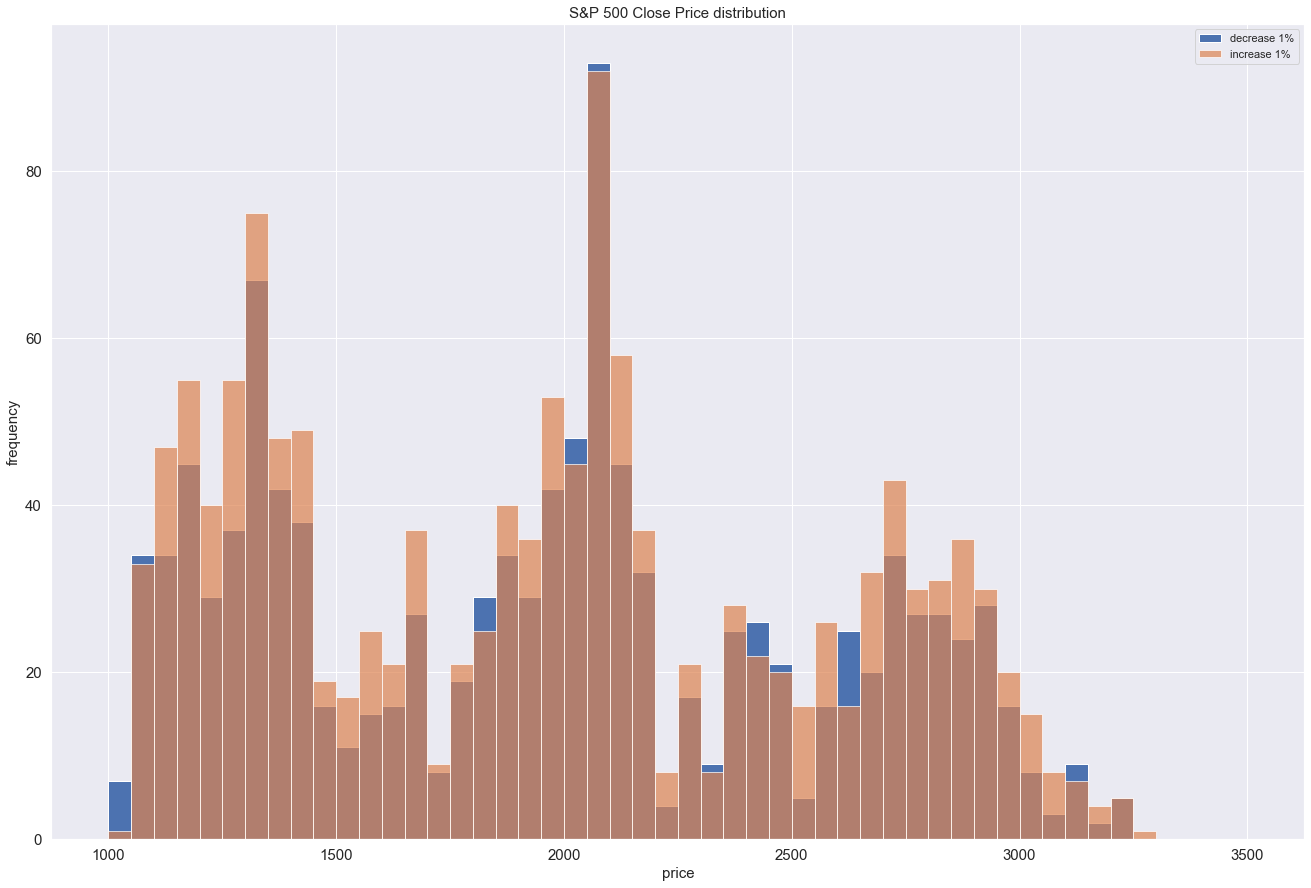

In [1515]:
fig, ax = plt.subplots(figsize=(20,15))
ax.hist(decrease, alpha=1.0, bins=50, range = [1000, 3500],
       label='decrease 1%')
ax.hist(increase,  alpha=0.7, bins=50, range = [1000, 3500],
       label='increase 1%')
plt.xlabel('price', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.title('S&P 500 Close Price distribution', fontsize=15)
plt.tick_params(labelsize=15)


plt.legend()
plt.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c765277b8>,
      dtype=object)

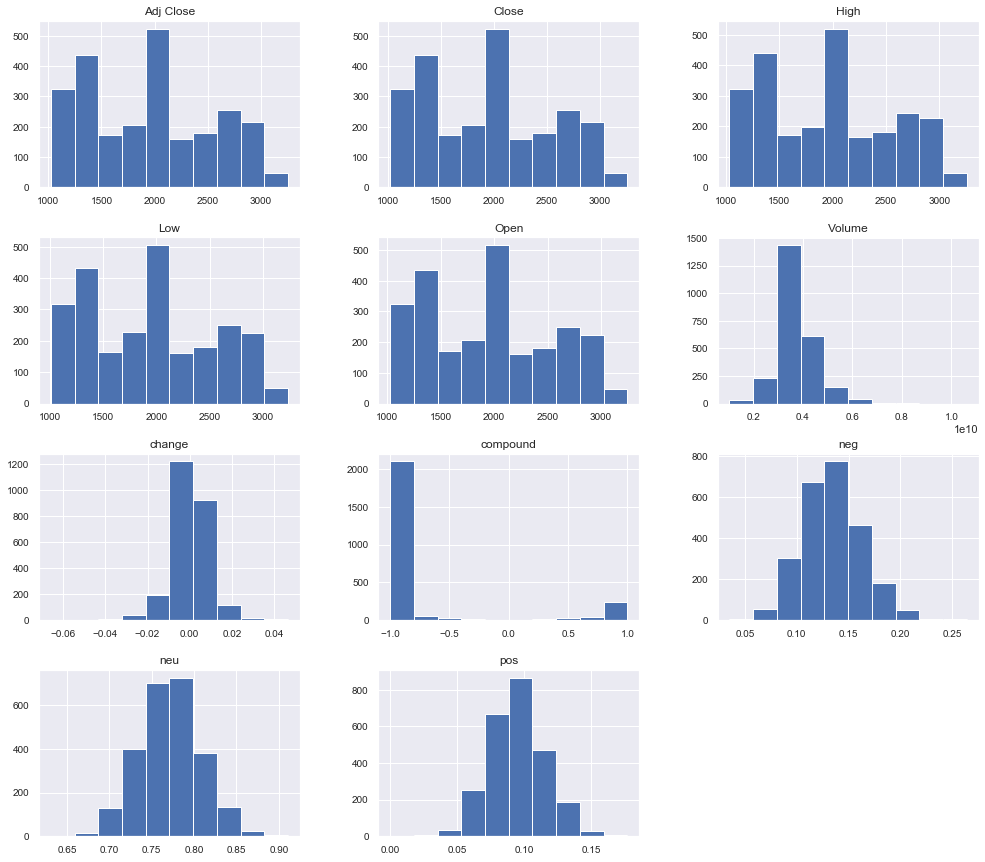

In [1516]:
sns.set()
totaldf.hist(sharex = False, sharey = False, xlabelsize = 10, ylabelsize = 10, figsize=(15, 15))
plt.show()

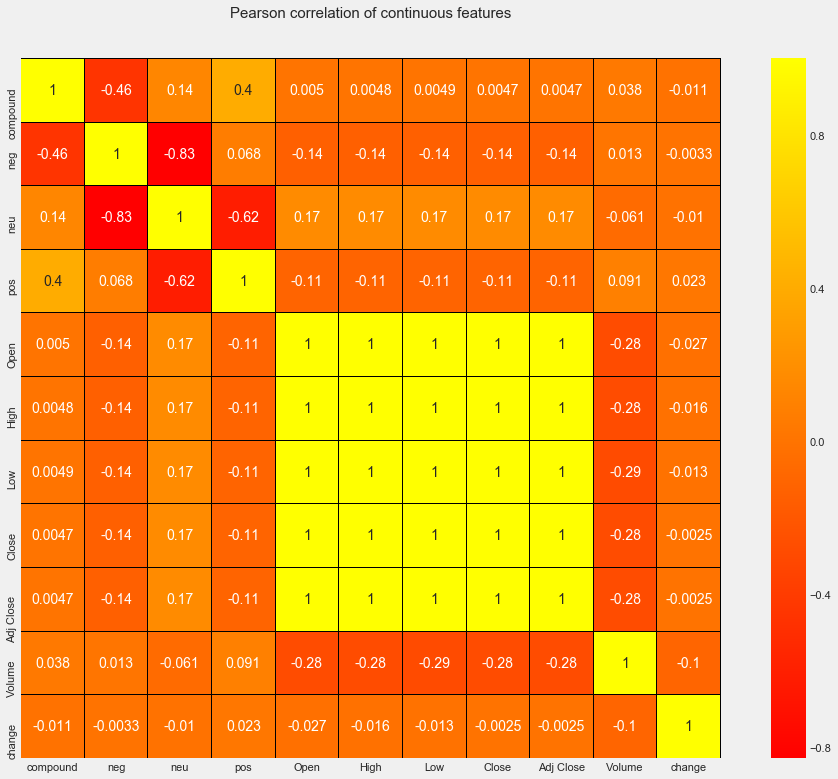

In [1064]:
colormap = plt.cm.autumn
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(totaldf.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='black', annot=True)
plt.show()

In [1529]:
import quandl
import config

In [1530]:
startdate = '2010-01-05'
enddate = '2020-01-06'

In [1337]:
quandl.ApiConfig.api_key = config.quandlapikey
quandlsent = quandl.get('AAII/AAII_SENTIMENT', start_date='2010-01-05', end_date='2020-01-06')

In [1338]:
quandlsent = quandlsent[['Bullish','Neutral','Bearish','Bullish Average']]

In [1340]:
quandlsent.reset_index(inplace=True)

In [1341]:
quandlsent.Date = pd.to_datetime(quandlsent.Date)

In [1510]:
quandlsent

,Bullish,Neutral,Bearish,Bullish Average,year-month
Date,,,,,
2010-01-07,0.410000,0.330000,0.260000,0.384907,2010-01-01
2010-01-14,0.474400,0.256400,0.269200,0.384907,2010-01-01
2010-01-21,0.400000,0.252600,0.347400,0.384907,2010-01-01
2010-01-28,0.350000,0.283300,0.366700,0.384907,2010-01-01
2010-02-04,0.292300,0.276900,0.430800,0.384907,2010-02-01
...,...,...,...,...,...
2019-12-05,0.317152,0.391586,0.291262,0.380745,2019-12-01
2019-12-12,0.376316,0.363158,0.260526,0.380745,2019-12-01
2019-12-19,0.440945,0.354331,0.204724,0.380745,2019-12-01


In [1343]:
quandlsent.index = quandlsent.Date

In [ ]:
quandlsent['year-month'] = [pd.datetime(year, month, 1) for year, month in zip(quandlsent['Date'].dt.year, quandlsent['Date'].dt.month)]

In [1532]:
quandlsent

,Bullish,Neutral,Bearish,Bullish Average,year-month
Date,,,,,
2010-01-07,0.410000,0.330000,0.260000,0.384907,2010-01-01
2010-01-14,0.474400,0.256400,0.269200,0.384907,2010-01-01
2010-01-21,0.400000,0.252600,0.347400,0.384907,2010-01-01
2010-01-28,0.350000,0.283300,0.366700,0.384907,2010-01-01
2010-02-04,0.292300,0.276900,0.430800,0.384907,2010-02-01
...,...,...,...,...,...
2019-12-05,0.317152,0.391586,0.291262,0.380745,2019-12-01
2019-12-12,0.376316,0.363158,0.260526,0.380745,2019-12-01
2019-12-19,0.440945,0.354331,0.204724,0.380745,2019-12-01


In [1274]:
divyield = quandl.get('MULTPL/SP500_DIV_YIELD_MONTH')

In [1486]:
divyield =  divyield.tail(121)

In [1487]:
divyield.rename(columns={'Value': 'Dividendyield'}, inplace= True)

In [1424]:
sp500bymonth = quandl.get('MULTPL/SP500_REAL_PRICE_MONTH')

In [1461]:
sp500bymonth = sp500bymonth.tail(122)

In [1475]:
sp500bymonth.rename(columns={'Value': 'SP500price'}, inplace= True)

In [1406]:
peratiomonth = quandl.get('MULTPL/SP500_PE_RATIO_MONTH')

In [1281]:
earningmonth = quandl.get('MULTPL/SP500_EARNINGS_YIELD_MONTH')


In [1480]:
adj_sp500 = quandl.get('MULTPL/SP500_INFLADJ_MONTH')

In [1484]:
adj_sp500 = adj_sp500.tail(122)

In [1485]:
adj_sp500.rename(columns={'Value': 'Adj_Price'}, inplace= True)

In [1417]:
peratiomonth = peratiomonth.tail(122)

In [1467]:
peratiomonth.rename(columns={'Value': 'P/E'}, inplace= True)

In [1465]:
eps = earningmonth.tail(122)

In [1468]:
eps.rename(columns = { 'Value': 'EPS'},inplace =True) 

In [1500]:
extra = pd.concat([eps,peratiomonth,divyield],axis=1)

In [1502]:
extra = extra.fillna(method='ffill')

In [1526]:
extra.iplot(
    xTitle='Date',
    title='EPS,P/E, DividendYield')

In [1504]:
sp500t = pd.concat([adj_sp500,sp500bymonth],axis=1)

In [1505]:
sp500t.iplot()

In [ ]:
data['year-month'] = [
    pd.datetime(year, month, 1) for year, month in zip(
        data['Date'].dt.year, data['Date'].dt.month)]

In [1479]:
totaldf.label.value_counts()

increase    1365
decrease    1148
Name: label, dtype: int64

In [1476]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

bin_col = totaldf.columns
zero_list = []
one_list = []
for col in bin_col:
    zero_count = 0
    one_count = 0
    for ix, val in totaldf[col].iteritems():
        if totaldf.loc[ix, 'label'] == 'decrease':
            zero_count += 1
        else:
            one_count += 1
    zero_list.append(zero_count)
    one_list.append(one_count)
    
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Decrease by -1%'
)

trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='Increase by +1%'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count increase or decrease percent compared with the previous day'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [1533]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=totaldf.Date,
                y=totaldf['High'],
                name="High",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=totaldf.Date,
                y=totaldf['Low'],
                name="low",
                line_color='dimgray',
                opacity=0.8))


fig.show()

# TRAIN TEST SPLIT

In [793]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [1001]:
totaldf.index = totaldf.Date

In [1002]:
totaldf = totaldf.drop('Date', axis =1)

In [1003]:
totaldf = totaldf.drop('Close', axis =1)

In [1004]:
totaldf['factorized'] = pd.factorize(totaldf.label)[0]

In [1005]:
totaldf.dropna(inplace=True)

In [1006]:
totaldf

,compound,neg,neu,pos,Open,High,Low,Adj Close,Volume,change,label,factorized
Date,,,,,,,,,,,,
2010-01-06,-0.9936,0.138,0.759,0.103,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,0.001259,increase,0
2010-01-07,-0.9977,0.139,0.773,0.088,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,0.004770,increase,0
2010-01-08,-0.9786,0.130,0.770,0.100,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,0.003910,increase,0
2010-01-11,-0.9888,0.116,0.793,0.090,1145.959961,1149.739990,1142.020020,1146.979980,4.255780e+09,0.000890,increase,0
2010-01-12,-0.9981,0.163,0.734,0.103,1143.810059,1143.810059,1131.770020,1136.219971,4.716160e+09,-0.006636,decrease,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,-0.9968,0.134,0.790,0.076,3240.090088,3240.919922,3216.570068,3221.290039,3.013290e+09,-0.005802,decrease,1
2019-12-31,-0.9987,0.140,0.759,0.101,3215.179932,3231.719971,3212.030029,3230.780029,2.893810e+09,0.004852,increase,0
2020-01-02,-0.9885,0.130,0.767,0.104,3244.669922,3258.139893,3235.530029,3257.850098,3.458250e+09,0.004062,increase,0


# CLASSIFICATION MODELS

In [981]:
X = totaldf.loc[:,'compound':'Volume']
y = totaldf.loc[:,'factorized']
# Set the validation size, i.e the test set to 20%
validation_size = 0.20
# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)
print(len(y))
print(train_size)

2513
1759


In [982]:
train_start_date = '2010-01-01'
train_end_date = '2016-12-31'
test_start_date = '2017-01-01'
test_end_date = '2019-12-31'
X_train = X.loc[train_start_date : train_end_date]
y_train = y.loc[train_start_date : train_end_date]
X_test = X.loc[test_start_date:test_end_date]
y_test = y.loc[test_start_date:test_end_date]

In [806]:

print('Observations: %d' % (len(totaldf.index)))
print('X Training Observations: %d' % (len(X_train.index)))
print('X Testing Observations: %d' % (len(X_test.index)))
print('y Training Observations: %d' % (len(y_train)))
print('y Testing Observations: %d' % (len(y_test)))

Observations: 2513
X Training Observations: 1759
X Testing Observations: 751
y Training Observations: 1759
y Testing Observations: 751


### Standardized X_train

In [984]:

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

In [985]:
model_rf = RandomForestClassifier()
model_rf.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_rf.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.5033288948069241
confusion matrix: 
[[208 201]
 [172 170]]
classification report: 
              precision    recall  f1-score   support

           0       0.55      0.51      0.53       409
           1       0.46      0.50      0.48       342

    accuracy                           0.50       751
   macro avg       0.50      0.50      0.50       751
weighted avg       0.51      0.50      0.50       751



In [989]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_lda.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.9760319573901465
confusion matrix: 
[[398  11]
 [  7 335]]
classification report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       409
           1       0.97      0.98      0.97       342

    accuracy                           0.98       751
   macro avg       0.98      0.98      0.98       751
weighted avg       0.98      0.98      0.98       751



In [990]:
## XGBlssibary
model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.5233022636484687
confusion matrix: 
[[313  96]
 [262  80]]
classification report: 
              precision    recall  f1-score   support

           0       0.54      0.77      0.64       409
           1       0.45      0.23      0.31       342

    accuracy                           0.52       751
   macro avg       0.50      0.50      0.47       751
weighted avg       0.50      0.52      0.49       751



In [991]:
model_logreg  = LogisticRegression()
model_logreg.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_logreg.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.8881491344873502
confusion matrix: 
[[368  41]
 [ 43 299]]
classification report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       409
           1       0.88      0.87      0.88       342

    accuracy                           0.89       751
   macro avg       0.89      0.89      0.89       751
weighted avg       0.89      0.89      0.89       751



In [810]:
# TFIDF

In [813]:
# remove stopword

In [814]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

# LINEAR REGRESSION

In [1008]:
totaldf['change'] = totaldf['change']*100

In [1011]:
totaldf['Hl_PCT'] = (totaldf['High'] - totaldf['Adj Close']) / totaldf['Adj Close'] * 100

In [1014]:
totaldf = totaldf[['Adj Close', 'Hl_PCT', 'change', 'Volume']]

In [1017]:
import math

In [1018]:
forecast_out = int(math.ceil(0.01*len(totaldf)))
forecast_col = "Adj Close"


In [1019]:
totaldf['label'] = totaldf[forecast_col].shift(-forecast_out)


/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1020]:
totaldf

,Adj Close,Hl_PCT,change,Volume,label
Date,,,,,
2010-01-06,1137.140015,0.180270,0.125917,4.972660e+09,1075.510010
2010-01-07,1141.689941,0.067446,0.476992,5.270680e+09,1094.869995
2010-01-08,1144.979980,0.035812,0.391046,4.389590e+09,1099.510010
2010-01-11,1146.979980,0.240633,0.089010,4.255780e+09,1106.750000
2010-01-12,1136.219971,0.668012,-0.663579,4.716160e+09,1109.170044
...,...,...,...,...,...
2019-12-30,3221.290039,0.609380,-0.580232,3.013290e+09,NaN
2019-12-31,3230.780029,0.029093,0.485201,2.893810e+09,NaN
2020-01-02,3257.850098,0.008895,0.406210,3.458250e+09,NaN


In [1022]:
from sklearn import preprocessing


In [1023]:
# 最后生成真正在模型中使用的数据X和y和预测时用到的数据数据X_lately
X = np.array(totaldf.drop(['label'], 1))
X = preprocessing.scale(X)
# 上面生成label列时留下的最后1%行的数据，这些行并没有label数据，因此我们可以拿他们作为预测时用到的输入数据
X_lately = X[-forecast_out:]
X = X[:-forecast_out]


/Users/zoe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



In [1025]:
# 抛弃label列中为空的那些行
totaldf.dropna(inplace=True)
y = np.array(totaldf['label'])

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1026]:
from sklearn import  model_selection, svm
from sklearn.linear_model import LinearRegression

In [1027]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)
clf = LinearRegression(n_jobs=-1)
 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
 
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy)

[3175.14424697 3169.06618621 3144.57639699 3112.42236249 3136.12465115
 3135.97120925 3169.36881972 3160.86998789 3156.0009995  3162.88013802
 3196.52583855 3195.15649193 3213.17100683 3211.86817172 3210.63788996
 3225.60688634 3230.82517545 3245.17774811 3250.28531546 3265.73514043
 3264.87273466 3248.74422897 3255.22907887 3279.36973843 3262.24624303
 3271.16080176] 0.9827900866226408


In [1031]:
totaldf.iloc[-1].name.time


'2019-11-26'

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zoe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



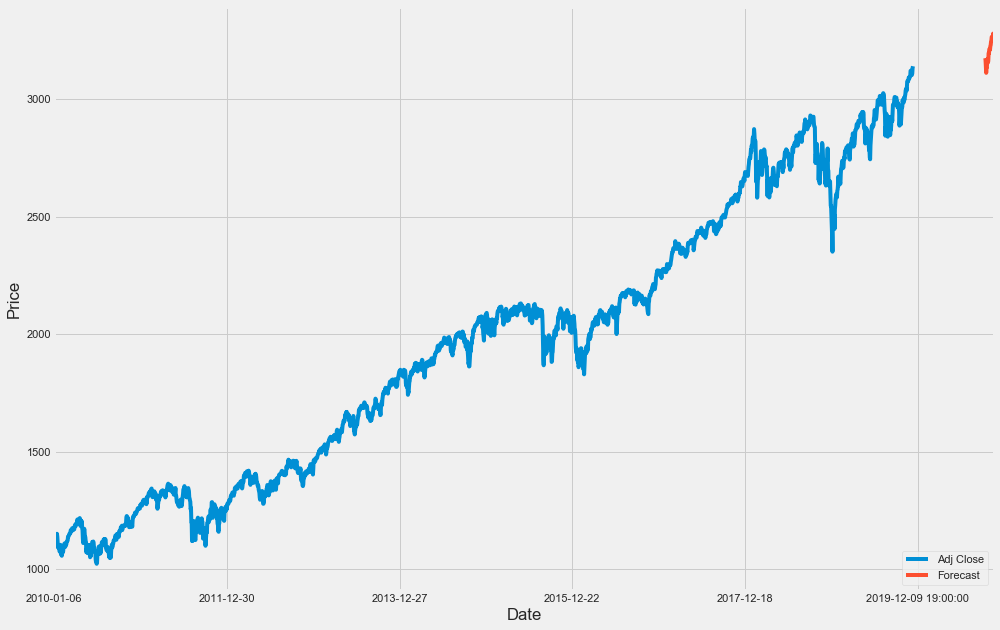

In [1052]:
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import arrow
 
plt.figure(figsize=(15, 10))
# 修改matplotlib样式
style.use('fivethirtyeight')
one_day = 86400
# 在df中新建Forecast列，用于存放预测结果的数据
totaldf['Forecast'] = np.nan
# 取df最后一行的时间索引
last_date = totaldf.iloc[-1].name
last_unix = arrow.get(last_date).timestamp
next_unix = last_unix + one_day
# 遍历预测结果，用它往df追加行
# 这些行除了Forecast字段，其他都设为np.nan

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    # [np.nan for _ in range(len(df.columns) - 1)]生成不包含Forecast字段的列表
    # 而[i]是只包含Forecast值的列表
    # 上述两个列表拼接在一起就组成了新行，按日期追加到df的下面
    totaldf.loc[next_date] = [np.nan for _ in range(len(totaldf.columns) - 1)] + [i]

totaldf['Adj Close'].plot()
totaldf['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [818]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer #tfidf
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier #bagging and randomforest
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm #svm

In [1067]:
totaldf['change'] = totaldf['change']*100

In [1066]:
totaldf['High_PCT'] = (totaldf['High'] - totaldf['Adj Close']) / totaldf['Adj Close'] * 100

In [1069]:
totaldf.index = totaldf.Date

In [1071]:
totaldf = totaldf.drop('Date', axis =1)

In [1080]:
dftot = totaldf[['compound','neg','pos','Open','High','Low','Volume','change','High_PCT','Close']]

,compound,neg,pos,Open,High,Low,Volume,change,High_PCT,Close
Date,,,,,,,,,,
2010-01-06,-0.9936,0.138,0.103,1135.709961,1139.189941,1133.949951,4.972660e+09,0.125917,0.180270,1137.140015
2010-01-07,-0.9977,0.139,0.088,1136.270020,1142.459961,1131.319946,5.270680e+09,0.476992,0.067446,1141.689941
2010-01-08,-0.9786,0.130,0.100,1140.520020,1145.390015,1136.219971,4.389590e+09,0.391046,0.035812,1144.979980
2010-01-11,-0.9888,0.116,0.090,1145.959961,1149.739990,1142.020020,4.255780e+09,0.089010,0.240633,1146.979980
2010-01-12,-0.9981,0.163,0.103,1143.810059,1143.810059,1131.770020,4.716160e+09,-0.663579,0.668012,1136.219971
...,...,...,...,...,...,...,...,...,...,...
2019-12-30,-0.9968,0.134,0.076,3240.090088,3240.919922,3216.570068,3.013290e+09,-0.580232,0.609380,3221.290039
2019-12-31,-0.9987,0.140,0.101,3215.179932,3231.719971,3212.030029,2.893810e+09,0.485201,0.029093,3230.780029
2020-01-02,-0.9885,0.130,0.104,3244.669922,3258.139893,3235.530029,3.458250e+09,0.406210,0.008895,3257.850098


In [1082]:
X = dftot.loc[:,'compound':'High_PCT']
y = dftot.loc[:,'Close']
# Set the validation size, i.e the test set to 20%
validation_size = 0.20
# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)
print(len(y))
print(train_size)

2515
1760


In [1102]:
train_start_date = '2010-01-01'
train_end_date = '2016-12-31'
test_start_date = '2017-01-03'
test_end_date = '2020-01-11'
train = dftot.loc[train_start_date : train_end_date]
test = dftot.loc[test_start_date:test_end_date]

In [1105]:
X_train = train[['compound','neg','pos','Open','High','Low','Volume','change','High_PCT']]

In [1106]:
y_train = train[['Close']]

In [1107]:
X_test = test[['compound','neg','pos','Open','High','Low','Volume','change','High_PCT']]

In [1108]:
y_test = test[['Close']]

In [1109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import time

In [1116]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [1117]:
print (rf.feature_importances_)

[1.13206451e-05 1.05579816e-05 1.23830892e-05 1.01818725e-02
 1.66196017e-01 8.23387707e-01 1.57489586e-05 9.97361039e-05
 8.46566694e-05]


In [1122]:

from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

In [1123]:
prediction, bias, contributions = ti.predict(rf, X_test)

In [1126]:
len(prediction)

755

In [1127]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], columns=['prices'])

In [1131]:
y_test.index 

Index(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09',
       '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17',
       ...
       '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
       '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06'],
      dtype='object', name='Date', length=755)

In [1132]:
predictions_df.index = y_test.index

In [1134]:
predictions_df

,prices
Date,
2017-01-03,2248.479692
2017-01-04,2265.194087
2017-01-05,2261.999287
2017-01-06,2267.547163
2017-01-09,2267.213657
...,...
2019-12-30,2267.110159
2019-12-31,2267.993162
2020-01-02,2267.730464


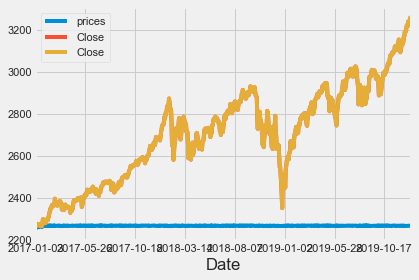

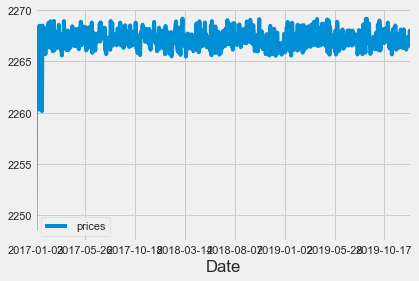

In [1137]:

predictions_df.plot()
y_test.plot(ax = predictions_plot).get_figure()

In [1162]:
X_train.shape[1]

9

In [1165]:
#数据转化为LSTM的输入数据类型（3D格式，【样本，时间步长，特征】）
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1760, 1, 9) (1760, 1) (755, 1, 9) (755, 1)


Train on 1760 samples, validate on 755 samples
Epoch 1/50
 - 1s - loss: 1646.6233 - val_loss: 2705.3588
Epoch 2/50
 - 0s - loss: 1646.1075 - val_loss: 2704.8430
Epoch 3/50
 - 0s - loss: 1645.5907 - val_loss: 2704.3254
Epoch 4/50
 - 0s - loss: 1645.0737 - val_loss: 2703.8088
Epoch 5/50
 - 0s - loss: 1644.5570 - val_loss: 2703.2922
Epoch 6/50
 - 0s - loss: 1644.0404 - val_loss: 2702.7756
Epoch 7/50
 - 0s - loss: 1643.5240 - val_loss: 2702.2595
Epoch 8/50
 - 0s - loss: 1643.0082 - val_loss: 2701.7435
Epoch 9/50
 - 0s - loss: 1642.4923 - val_loss: 2701.2278
Epoch 10/50
 - 0s - loss: 1641.9763 - val_loss: 2700.7116
Epoch 11/50
 - 0s - loss: 1641.4603 - val_loss: 2700.1960
Epoch 12/50
 - 0s - loss: 1640.9446 - val_loss: 2699.6801
Epoch 13/50
 - 0s - loss: 1640.4288 - val_loss: 2699.1645
Epoch 14/50
 - 0s - loss: 1639.9130 - val_loss: 2698.6486
Epoch 15/50
 - 0s - loss: 1639.3973 - val_loss: 2698.1327
Epoch 16/50
 - 0s - loss: 1638.8815 - val_loss: 2697.6171
Epoch 17/50
 - 0s - loss: 1638.365

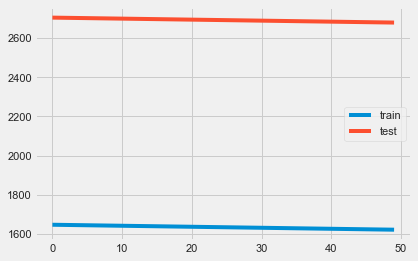

In [1166]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense
from matplotlib import pyplot

#在第一个隐层中定义具有50个神经元的LSTM和用于预测close的
#输出层中的1个神经元，输入形状是1个时间步长，具有5个特征。
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

#使用平均绝对误差（MAE）损失函数。该模型将拟合50个批量大小为64的
#训练时期。通过在fit（）函数中设置validation_data参数来跟踪训练
#过程中的训练和测试失败
#epochs和batch_size调了好长时间效果一直不好
history = model.fit(X_train, y_train, epochs=50, \
                    batch_size=32, validation_data=(X_test, y_test),\
                    verbose=2, shuffle=False)


pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [1147]:
import numpy as np
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [1149]:
test

,compound,neg,pos,Open,High,Low,Volume,change,High_PCT,Close
Date,,,,,,,,,,
2017-01-03,-0.9972,0.155,0.108,2251.570068,2263.879883,2245.129883,3.770530e+09,0.278029,0.267948,2257.830078
2017-01-04,-0.8107,0.117,0.113,2261.600098,2272.820068,2261.600098,3.764890e+09,0.404576,0.091162,2270.750000
2017-01-05,-0.9883,0.122,0.106,2268.179932,2271.500000,2260.449951,3.761820e+09,0.036155,0.110181,2269.000000
2017-01-06,-0.9980,0.140,0.101,2271.139893,2282.100098,2264.060059,3.339890e+09,0.257143,0.224864,2276.979980
2017-01-09,-0.9939,0.133,0.077,2273.590088,2275.489990,2268.899902,3.217610e+09,-0.206290,0.290453,2268.899902
...,...,...,...,...,...,...,...,...,...,...
2019-12-30,-0.9968,0.134,0.076,3240.090088,3240.919922,3216.570068,3.013290e+09,-0.580232,0.609380,3221.290039
2019-12-31,-0.9987,0.140,0.101,3215.179932,3231.719971,3212.030029,2.893810e+09,0.485201,0.029093,3230.780029
2020-01-02,-0.9885,0.130,0.104,3244.669922,3258.139893,3235.530029,3.458250e+09,0.406210,0.008895,3257.850098


In [1152]:
predictions_df

,prices,ewm
Date,,
2017-01-03,2248.479692,2248.479692
2017-01-04,2265.194087,2256.976176
2017-01-05,2261.999287,2258.706664
2017-01-06,2267.547163,2261.028502
2017-01-09,2267.213657,2262.349353
...,...,...
2019-12-30,2267.110159,2267.070198
2019-12-31,2267.993162,2267.100460
2020-01-02,2267.730464,2267.121115


In [1153]:
test

,compound,neg,pos,Open,High,Low,Volume,change,High_PCT,Close
Date,,,,,,,,,,
2017-01-03,-0.9972,0.155,0.108,2251.570068,2263.879883,2245.129883,3.770530e+09,0.278029,0.267948,2257.830078
2017-01-04,-0.8107,0.117,0.113,2261.600098,2272.820068,2261.600098,3.764890e+09,0.404576,0.091162,2270.750000
2017-01-05,-0.9883,0.122,0.106,2268.179932,2271.500000,2260.449951,3.761820e+09,0.036155,0.110181,2269.000000
2017-01-06,-0.9980,0.140,0.101,2271.139893,2282.100098,2264.060059,3.339890e+09,0.257143,0.224864,2276.979980
2017-01-09,-0.9939,0.133,0.077,2273.590088,2275.489990,2268.899902,3.217610e+09,-0.206290,0.290453,2268.899902
...,...,...,...,...,...,...,...,...,...,...
2019-12-30,-0.9968,0.134,0.076,3240.090088,3240.919922,3216.570068,3.013290e+09,-0.580232,0.609380,3221.290039
2019-12-31,-0.9987,0.140,0.101,3215.179932,3231.719971,3212.030029,2.893810e+09,0.485201,0.029093,3230.780029
2020-01-02,-0.9885,0.130,0.104,3244.669922,3258.139893,3235.530029,3.458250e+09,0.406210,0.008895,3257.850098


In [1154]:
# Pandas EWMA
# predictions_df['ewma'] = pd.ewma(predictions_df["prices"], span=60, freq="D").mean()
predictions_df['ewm'] = predictions_df["prices"].ewm(span=60, adjust=True, ignore_na=False).mean()

predictions_df['actual_value'] = test['Close']
# predictions_df['actual_value_ewma'] = pd.ewma(predictions_df["actual_value"], span=60, freq="D").mean()
predictions_df['actual_value_ewm'] = predictions_df["actual_value"].ewm(span=60, min_periods=0, adjust=True, ignore_na=False).mean()
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']



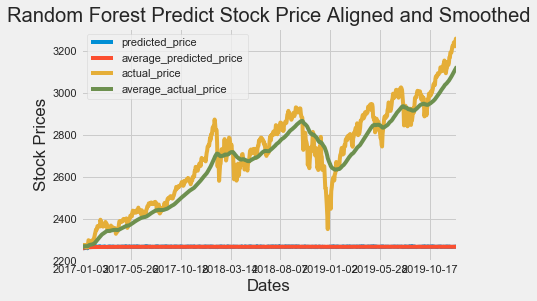

In [1155]:
predictions_plot = predictions_df.plot(title='Random Forest Predict Stock Price Aligned and Smoothed')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
#fig.savefig("RF_smoothed.png")

In [1111]:
rf_pred = rfclassifier.predict(X_test)  

In [1112]:
def print_accuracy_indices(labels, preds):
    print("Precision Score: {}".format(precision_score(labels,preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'weighted')))

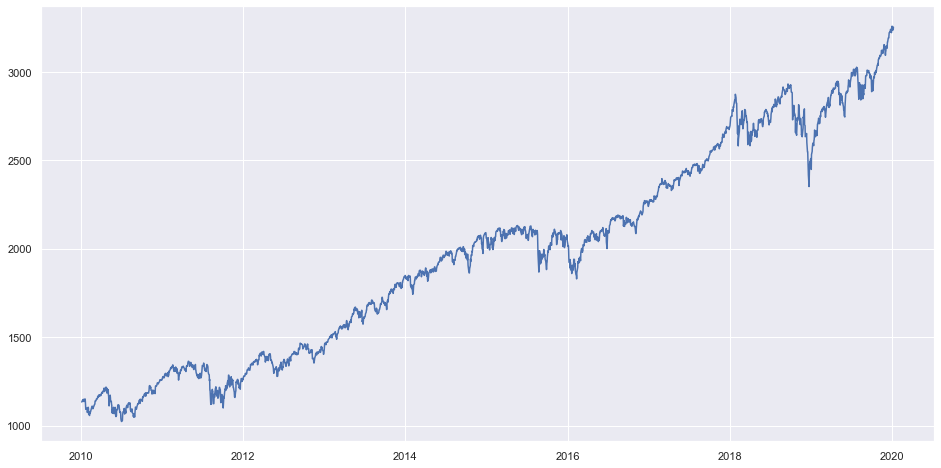

In [836]:
#setting index as date

sp500['Date'] = pd.to_datetime(sp500.Date,format='%Y-%m-%d')

sp500.index = sp500['Date']

#plot

plt.figure(figsize=(16,8))

plt.plot(sp500['Close'], label='Close Price history')

In [1157]:
totaldf

,compound,neg,neu,pos,Open,High,Low,Close,Adj Close,Volume,change,label,High_PCT
Date,,,,,,,,,,,,,
2010-01-06,-0.9936,0.138,0.759,0.103,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4.972660e+09,0.125917,increase,0.180270
2010-01-07,-0.9977,0.139,0.773,0.088,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5.270680e+09,0.476992,increase,0.067446
2010-01-08,-0.9786,0.130,0.770,0.100,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4.389590e+09,0.391046,increase,0.035812
2010-01-11,-0.9888,0.116,0.793,0.090,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4.255780e+09,0.089010,increase,0.240633
2010-01-12,-0.9981,0.163,0.734,0.103,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4.716160e+09,-0.663579,decrease,0.668012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,-0.9968,0.134,0.790,0.076,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3.013290e+09,-0.580232,decrease,0.609380
2019-12-31,-0.9987,0.140,0.759,0.101,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2.893810e+09,0.485201,increase,0.029093
2020-01-02,-0.9885,0.130,0.767,0.104,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3.458250e+09,0.406210,increase,0.008895


In [840]:
advancedmodel = MultinomialNB(alpha=0.0001)
advancedmodel = advancedmodel.fit(advancedtrain, df["factorized"])
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
preds5 = advancedmodel.predict(advancedtest)
acc5 = accuracy_score(test['Label'], preds5)

ValueError: Found input variables with inconsistent numbers of samples: [2510, 2513]

In [1076]:
totaldf

,compound,neg,neu,pos,Open,High,Low,Close,Adj Close,Volume,change,label,High_PCT
Date,,,,,,,,,,,,,
2010-01-06,-0.9936,0.138,0.759,0.103,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4.972660e+09,0.125917,increase,0.180270
2010-01-07,-0.9977,0.139,0.773,0.088,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5.270680e+09,0.476992,increase,0.067446
2010-01-08,-0.9786,0.130,0.770,0.100,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4.389590e+09,0.391046,increase,0.035812
2010-01-11,-0.9888,0.116,0.793,0.090,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4.255780e+09,0.089010,increase,0.240633
2010-01-12,-0.9981,0.163,0.734,0.103,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4.716160e+09,-0.663579,decrease,0.668012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,-0.9968,0.134,0.790,0.076,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3.013290e+09,-0.580232,decrease,0.609380
2019-12-31,-0.9987,0.140,0.759,0.101,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2.893810e+09,0.485201,increase,0.029093
2020-01-02,-0.9885,0.130,0.767,0.104,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3.458250e+09,0.406210,increase,0.008895


In [842]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

IndentationError: unexpected indent (<ipython-input-842-157c4f4e3e62>, line 13)

In [843]:
sp500 = sp500.drop('Date', axis =1)

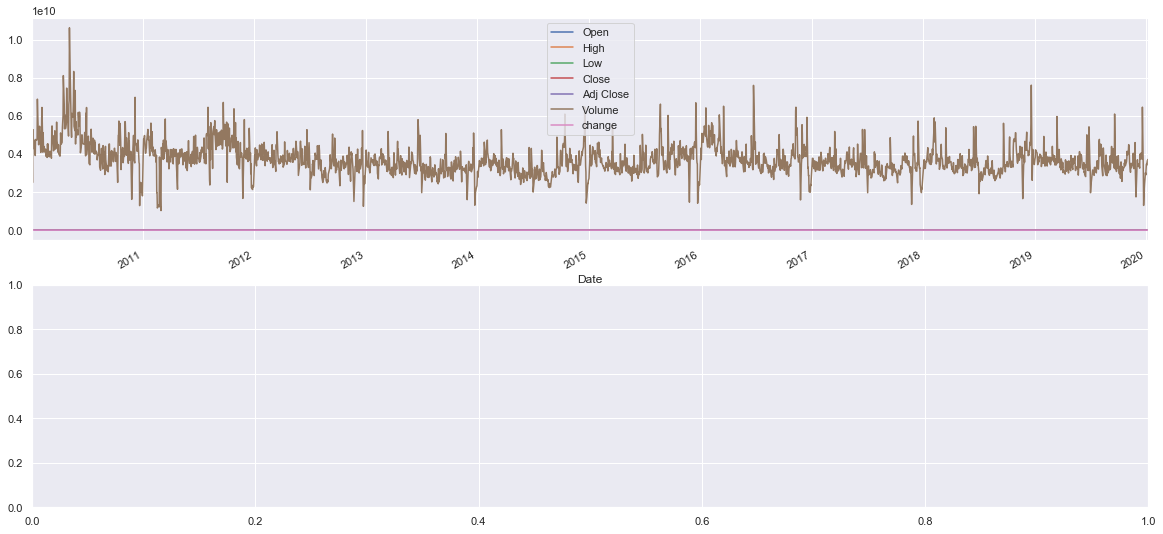

In [844]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
sp500.plot(ax=ax1) # series plot
 # lag plot

In [1167]:
totaldf

,compound,neg,neu,pos,Open,High,Low,Close,Adj Close,Volume,change,label,High_PCT
Date,,,,,,,,,,,,,
2010-01-06,-0.9936,0.138,0.759,0.103,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4.972660e+09,0.125917,increase,0.180270
2010-01-07,-0.9977,0.139,0.773,0.088,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5.270680e+09,0.476992,increase,0.067446
2010-01-08,-0.9786,0.130,0.770,0.100,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4.389590e+09,0.391046,increase,0.035812
2010-01-11,-0.9888,0.116,0.793,0.090,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4.255780e+09,0.089010,increase,0.240633
2010-01-12,-0.9981,0.163,0.734,0.103,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4.716160e+09,-0.663579,decrease,0.668012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,-0.9968,0.134,0.790,0.076,3240.090088,3240.919922,3216.570068,3221.290039,3221.290039,3.013290e+09,-0.580232,decrease,0.609380
2019-12-31,-0.9987,0.140,0.759,0.101,3215.179932,3231.719971,3212.030029,3230.780029,3230.780029,2.893810e+09,0.485201,increase,0.029093
2020-01-02,-0.9885,0.130,0.767,0.104,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3.458250e+09,0.406210,increase,0.008895


In [1170]:
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
sns.set(color_codes=True)


In [1171]:
#可以分别获得趋势、季节性和随机性
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

NameError: name 'decomposition' is not defined

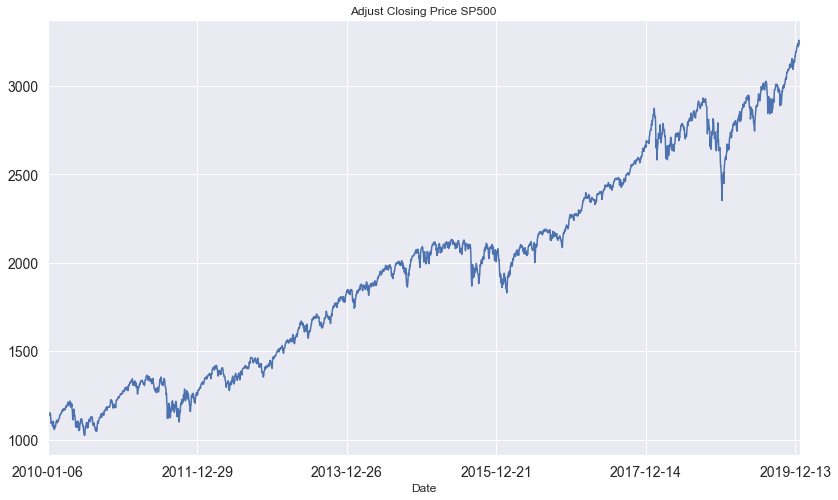

In [1174]:
totaldf['Adj Close'].plot(figsize=(12,8), title= 'Adjust Closing Price SP500', fontsize=14)


<Figure size 432x288 with 0 Axes>

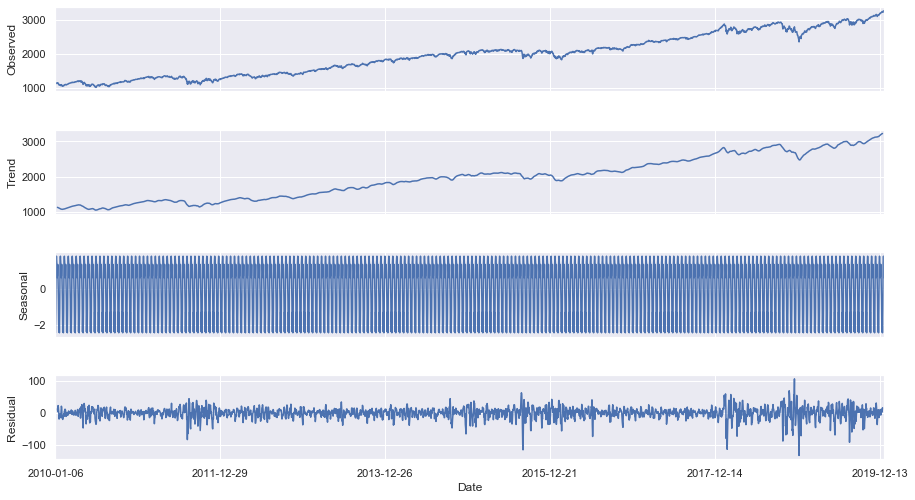

In [1177]:
decomposition = seasonal_decompose(totaldf['Adj Close'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)


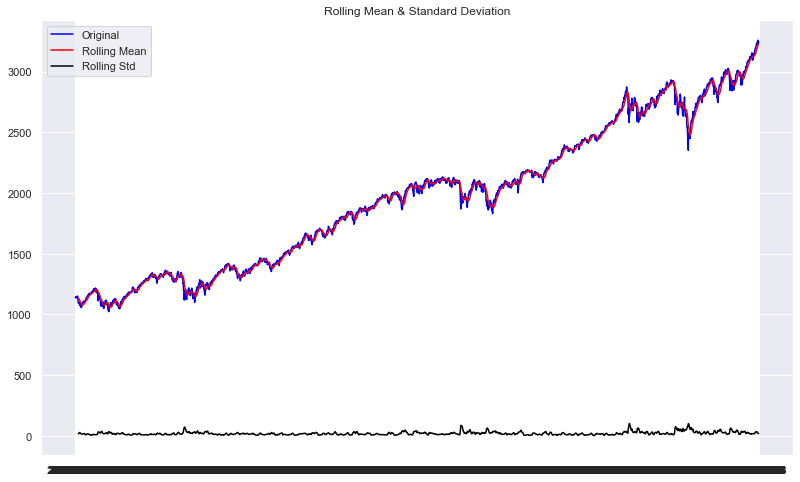

Results of Dickey-Fuller Test:
Test Statistic                    0.408308
p-value                           0.981803
#Lags Used                       22.000000
Number of Observations Used    2492.000000
Critical Value (1%)              -3.432977
Critical Value (5%)              -2.862701
Critical Value (10%)             -2.567388
dtype: float64


In [1179]:

from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()


    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(totaldf['Adj Close'])

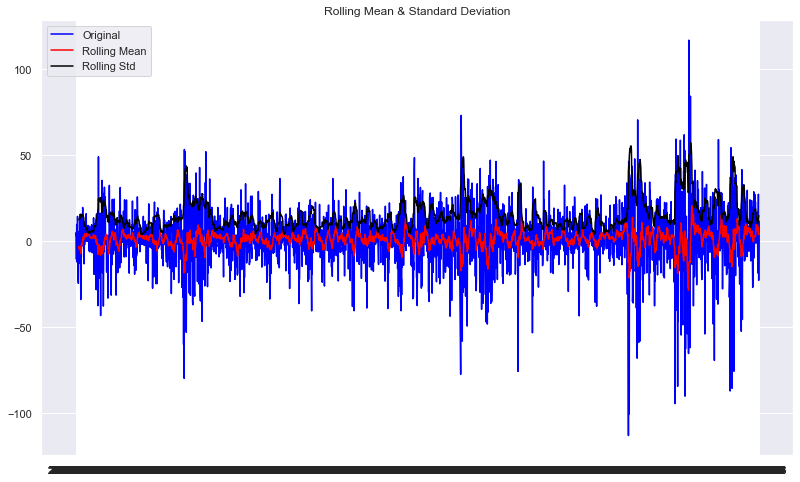

Results of Dickey-Fuller Test:
Test Statistic                -1.148013e+01
p-value                        5.018156e-21
#Lags Used                     2.100000e+01
Number of Observations Used    2.492000e+03
Critical Value (1%)           -3.432977e+00
Critical Value (5%)           -2.862701e+00
Critical Value (10%)          -2.567388e+00
dtype: float64


In [1180]:
totaldf['first_difference'] = totaldf['Adj Close'] - totaldf['Adj Close'].shift(1)    #也可以使用diff()
test_stationarity(totaldf.first_difference.dropna(inplace=False))


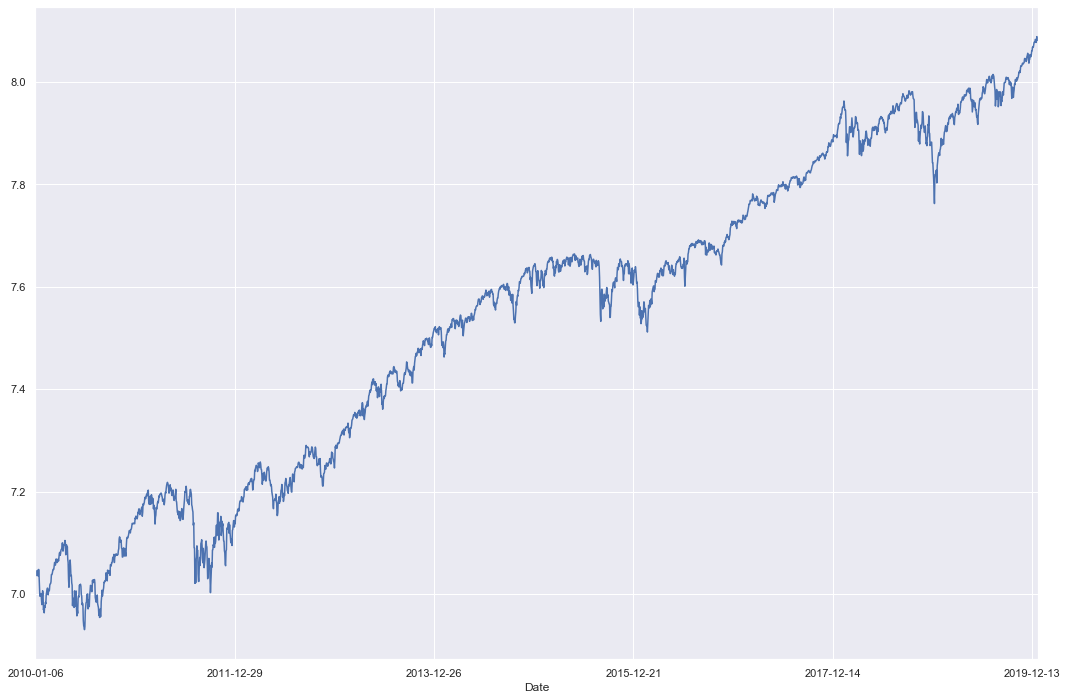

In [1181]:
totaldf['Natural Log'] = totaldf['Adj Close'].apply(lambda x: np.log(x))  
totaldf['Natural Log'].plot(figsize=(16, 12))

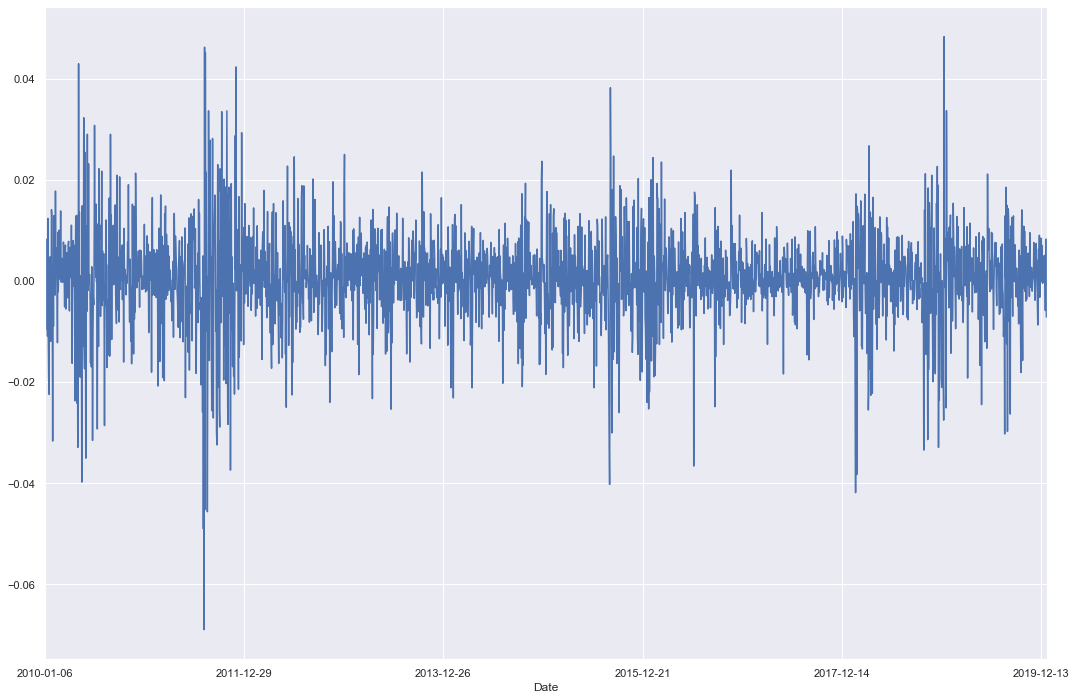

In [1183]:
totaldf['Logged First Difference'] = totaldf['Natural Log'] - totaldf['Natural Log'].shift()  
totaldf['Logged First Difference'].plot(figsize=(16, 12))

In [1184]:
totaldf['Lag 1'] = totaldf['Logged First Difference'].shift()  
totaldf['Lag 2'] = totaldf['Logged First Difference'].shift(2)  
totaldf['Lag 5'] = totaldf['Logged First Difference'].shift(5)  
totaldf['Lag 30'] = totaldf['Logged First Difference'].shift(30)


/Users/zoe/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



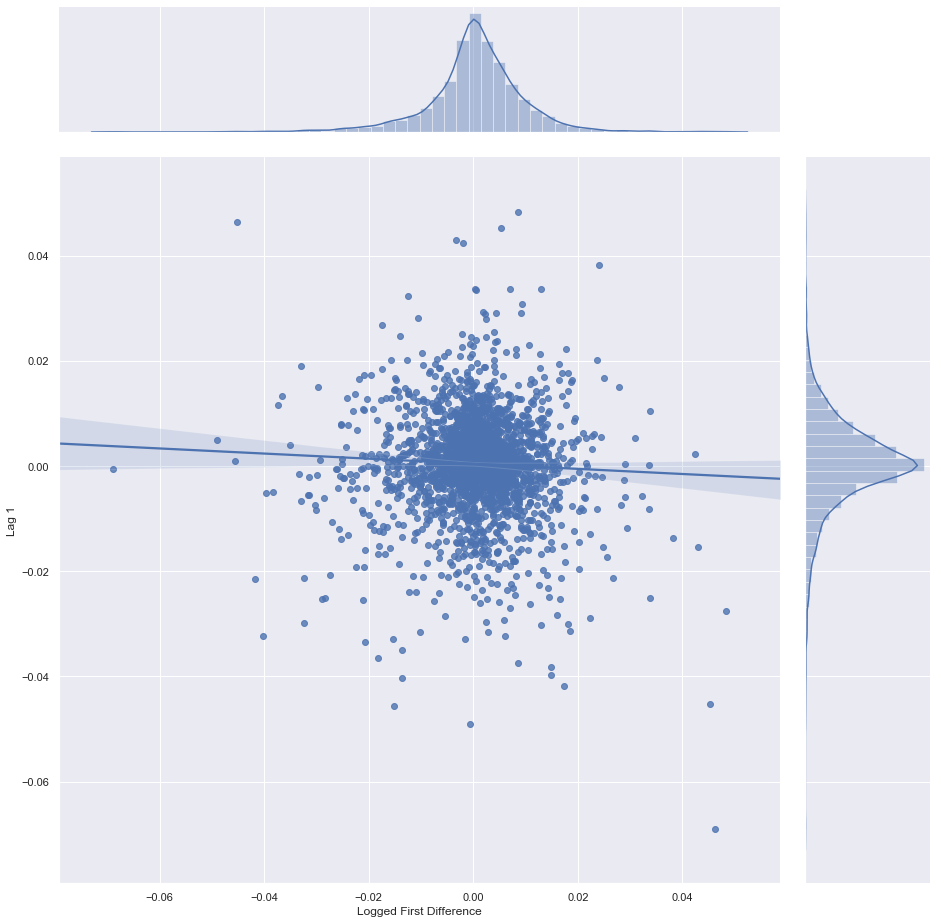

In [1186]:
sns.jointplot('Logged First Difference', 'Lag 1', totaldf, kind='reg', size=13)

/Users/zoe/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



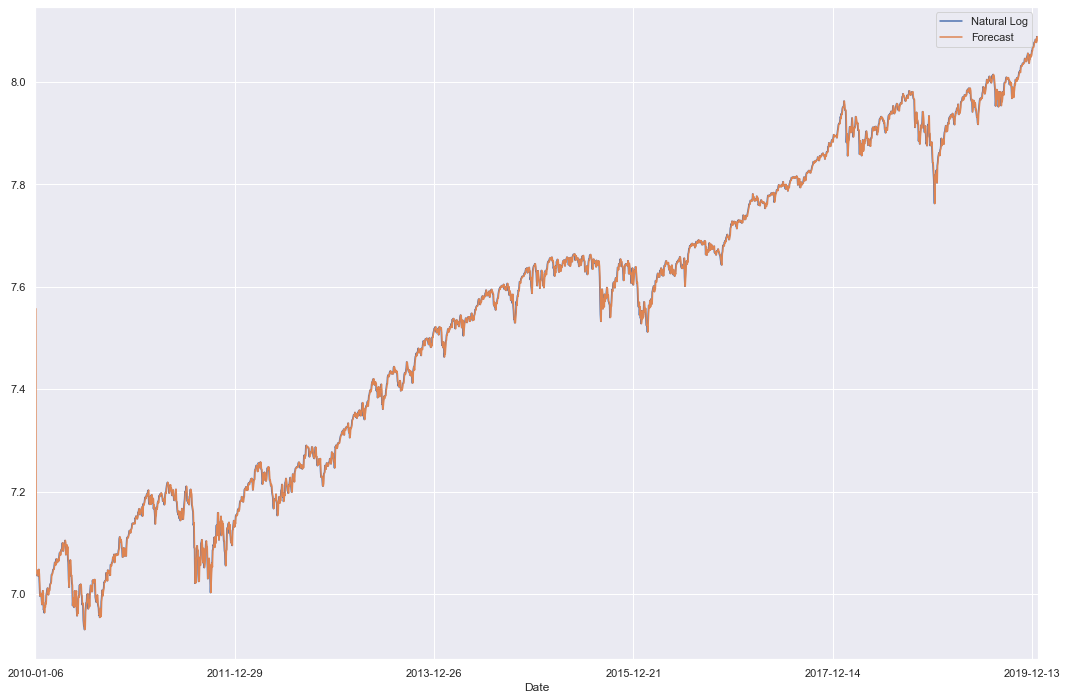

In [1187]:
model = sm.tsa.ARIMA(totaldf['Natural Log'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
totaldf['Forecast'] = results.fittedvalues  
totaldf[['Natural Log', 'Forecast']].plot(figsize=(16, 12))

/Users/zoe/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



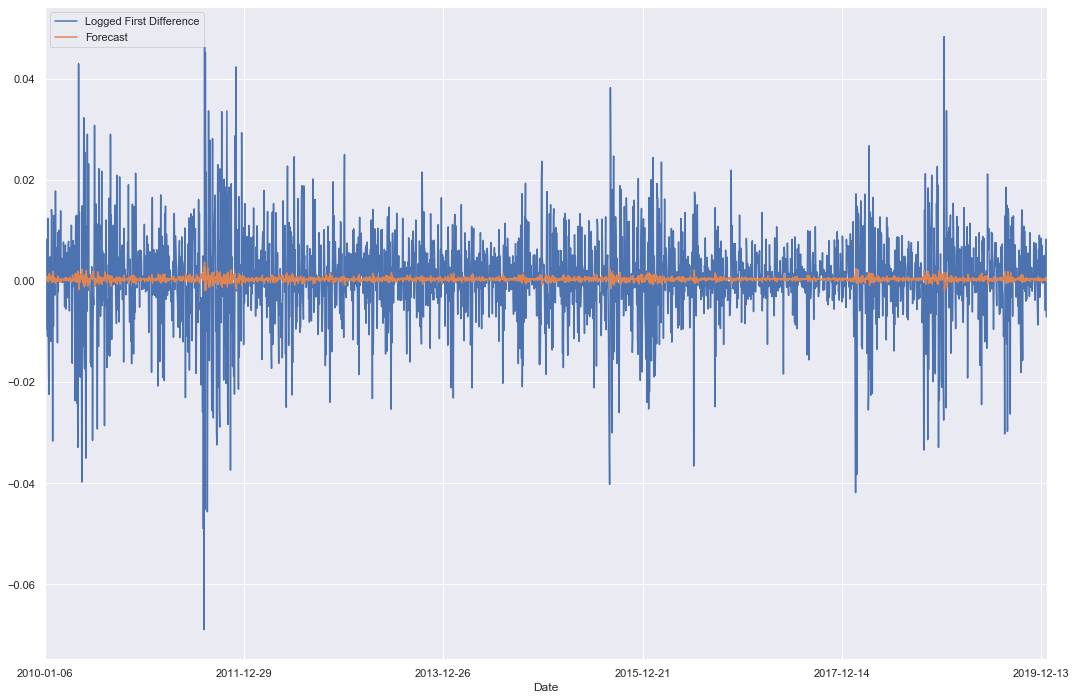

In [1188]:
model = sm.tsa.ARIMA(totaldf['Logged First Difference'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
totaldf['Forecast'] = results.fittedvalues  
totaldf[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))

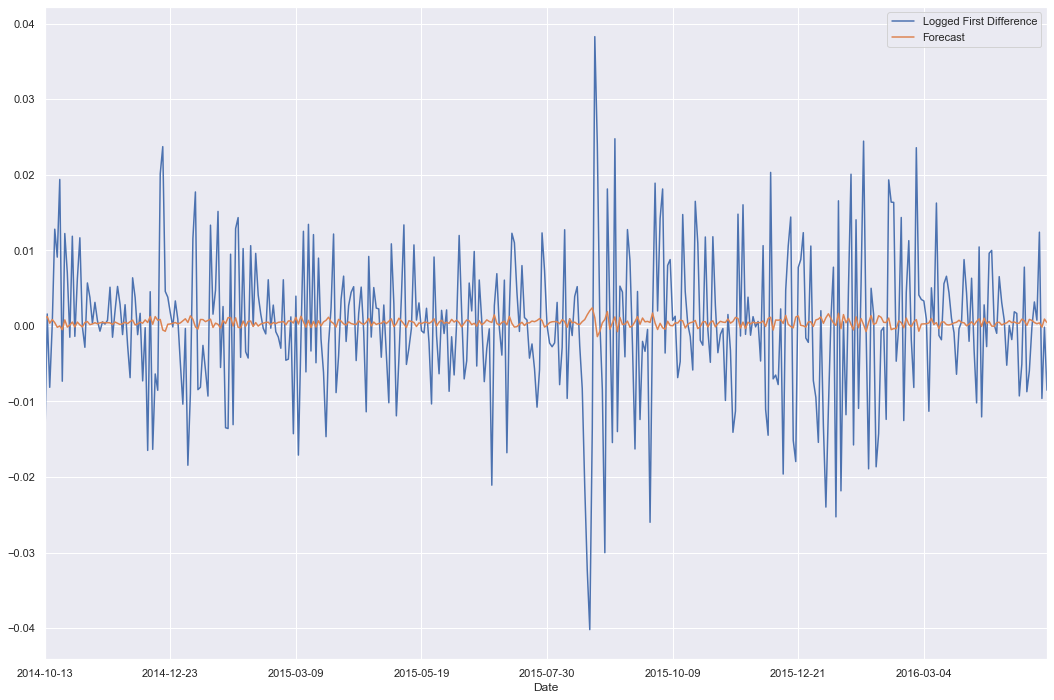

In [1189]:
totaldf[['Logged First Difference', 'Forecast']].iloc[1200:1600, :].plot(figsize=(16, 12))

In [ ]:
#missing value treatment
cols = totaldf.columns
for j in cols:
    for i in range(0,len(data)):
        if data[j][i] == -200:
            data[j][i] = data[j][i-1]

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data.drop([ 'CO(GT)'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

In [1193]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=X_train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(y_train))

In [1196]:

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
coint_johansen(totaldf.Close,-1,1).eig

IndexError: tuple index out of range

In [1194]:
prediction

array([[-9.60066134e-01,  1.51772542e-01,  8.80006242e-02, ...,
         2.90513688e+09,  7.54687368e-03,  4.11674217e-01],
       [-9.71266414e-01,  1.51128304e-01,  8.72844619e-02, ...,
         3.09265247e+09,  1.52854635e-02,  3.65459763e-01],
       [-9.61479940e-01,  1.50515167e-01,  8.73624501e-02, ...,
         3.20202097e+09,  5.04368387e-03,  3.57099996e-01],
       ...,
       [-1.03055558e+00,  1.55292568e-01,  8.34462580e-02, ...,
         3.13162761e+09, -2.66013270e-02,  2.84292257e-01],
       [-1.03058559e+00,  1.55294480e-01,  8.34448449e-02, ...,
         3.13154757e+09, -2.66090833e-02,  2.84265410e-01],
       [-1.03061559e+00,  1.55296391e-01,  8.34434326e-02, ...,
         3.13146757e+09, -2.66168352e-02,  2.84238578e-01]])